In [137]:
# Import required package

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn import preprocessing

import numpy as np

In [138]:
# read the dataset file
data_8th = pd.read_csv('Data_8th_Nov.csv')
data_16th = pd.read_csv('Data_16_original.csv')

data_both = pd.read_csv('8th16th.csv')


# Deleting the first columns of sequence number
data_8th.drop(data_8th.columns[0],axis=1,inplace=True)
data_16th.drop(data_16th.columns[0],axis=1,inplace=True)
data_both.drop(data_both.columns[0],axis=1,inplace=True)

# Printing basic info of dataset
print 'Number of records & attributes for 8th Nov:',data_8th.shape
print 'Number of records & attributes for 16th Nov:',data_16th.shape


# Printing Column names
print([a for a in data_8th.columns])
print(data_8th.group.unique())
print(data_16th.group.unique())
print(data_both.group.unique())

Number of records & attributes for 8th Nov: (41, 12)
Number of records & attributes for 16th Nov: (77, 12)
['timestamp', 'group', 'disengaged', 'looking', 'talking', 'intTech', 'intRes', 'intExt', 'Accessed', 'Create', 'Open', 'Update']
['1ABCD' '2ABCD' '3ABCDE' '4ABCDE']
['1AB' '1CD' '1GF' '1HI' '2ABC' '2DE' '2FGH' '2IJ' '3AB' '3CD']
['1ABCD' '2ABCD' '3ABCDE' '4ABCDE' '1AB' '1CD' '1GF' '1HI' '2ABC' '2DE'
 '2FGH' '2IJ' '3AB' '3CD']


## Analysis on 8th Nov data

In [139]:

# MFA was applied using another python library (which is not the part of anaconda libraries)
mfa_df = pd.read_csv('mfaresult_8th.csv')
mfa_both = pd.read_csv('mfaresult_both.csv')
# Adding resultant dimensions of MFA to data
data_8th['engagement'] = mfa_df.iloc[:,1]
data_8th['techvsphy'] = mfa_df.iloc[:,2]

data_both['engagement'] = mfa_both.iloc[:,1]
data_both['techvsphy'] = mfa_both.iloc[:,2]

In [140]:
final_dim_8th = data_8th.loc[:,['timestamp','group','engagement']]
final_dim_8th.set_index(pd.DatetimeIndex(final_dim_8th['timestamp']),inplace=True)

final_dim_both = data_both.loc[:,['timestamp','group','engagement']]
final_dim_both.set_index(pd.DatetimeIndex(final_dim_both['timestamp']),inplace=True)

In [144]:
# Plotting time series data for each group
group = '4ABCDE'

group_data = final_dim_8th.loc[final_dim_8th.group==group,:]

plt.plot(group_data['timestamp'],group_data['engagement'],label='8th Nov')
plt.xticks(rotation=90)
plt.ylabel('Engagement')
plt.title('Group : %s engagement'%group)
print(group_data['engagement'].values)
# Combined data analysis

group_data = final_dim_both.loc[final_dim_both.group==group,:]

plt.plot(group_data['timestamp'],group_data['engagement'],label='combined')
plt.xticks(rotation=90)
plt.ylabel('Engagement')
plt.title('Group : %s engagement'%group)
plt.legend()
plt.show()
plt.savefig('group_%s'%group)


[-0.61351303  0.69309773 -0.62262685 -1.34820866 -1.21867668 -0.53587874
 -1.09346827 -0.5143716  -1.45944978]


<IPython.core.display.Javascript object>


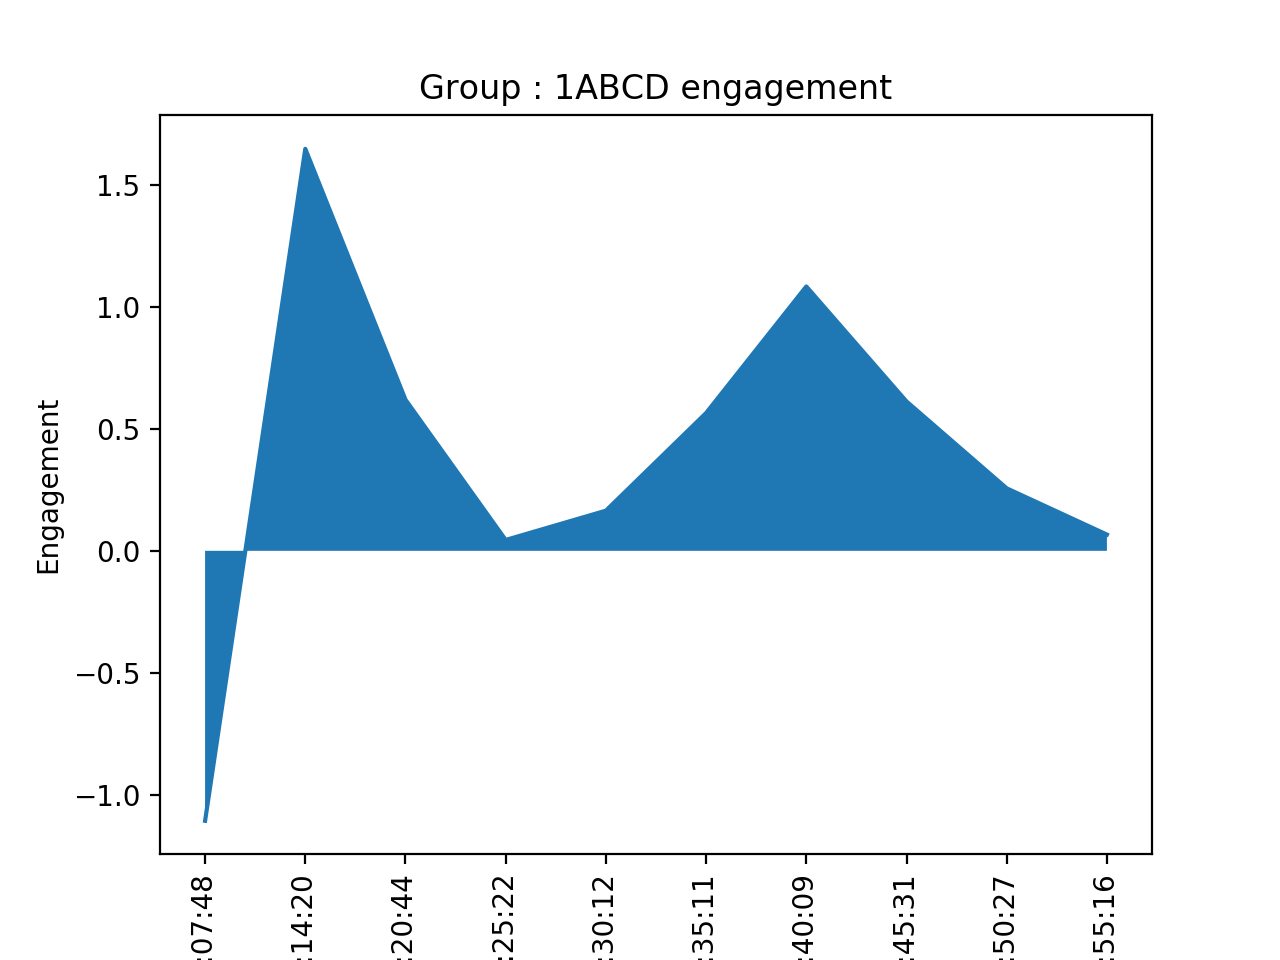

In [152]:
group = '1ABCD'
plt.figure()
group_data = final_dim_8th.loc[final_dim_8th.group==group,:]

plt.plot(group_data['timestamp'],group_data['engagement'],label='8th Nov')
plt.fill_between(group_data['timestamp'],group_data['engagement'])
plt.xticks(rotation=90)
plt.ylabel('Engagement')
plt.title('Group : %s engagement'%group)
plt.savefig('example:trapezoidal')


## Area under curves for 8th Nov data

In [113]:
# Area calculation for each group
group = '1ABCD'
engagement_8th=dict()
for group in data_8th.group.unique():
    group_data = final_dim_8th.loc[final_dim_8th.group==group,:]
    a = group_data.loc[:,'engagement']
    #print(a.values)
    area = np.trapz(a.values)
    engagement_8th[group]=area
    print('%s : %f'%(group,area))


1ABCD : 4.477411
2ABCD : 6.844667
3ABCDE : -3.088748
4ABCDE : -5.676614


{'3AB': -0.6625176389788587, '2FGH': -2.466278688011126, '1AB': -2.2990506061951366, '2DE': 0.6101559469878077, '2ABC': -6.417315566393614, '2IJ': 0.49430583209422757, '1CD': -2.177744732074417, '1GF': 6.687663664688483, '1HI': 2.0736948675848805, '3CD': 5.597722598552613}


<IPython.core.display.Javascript object>


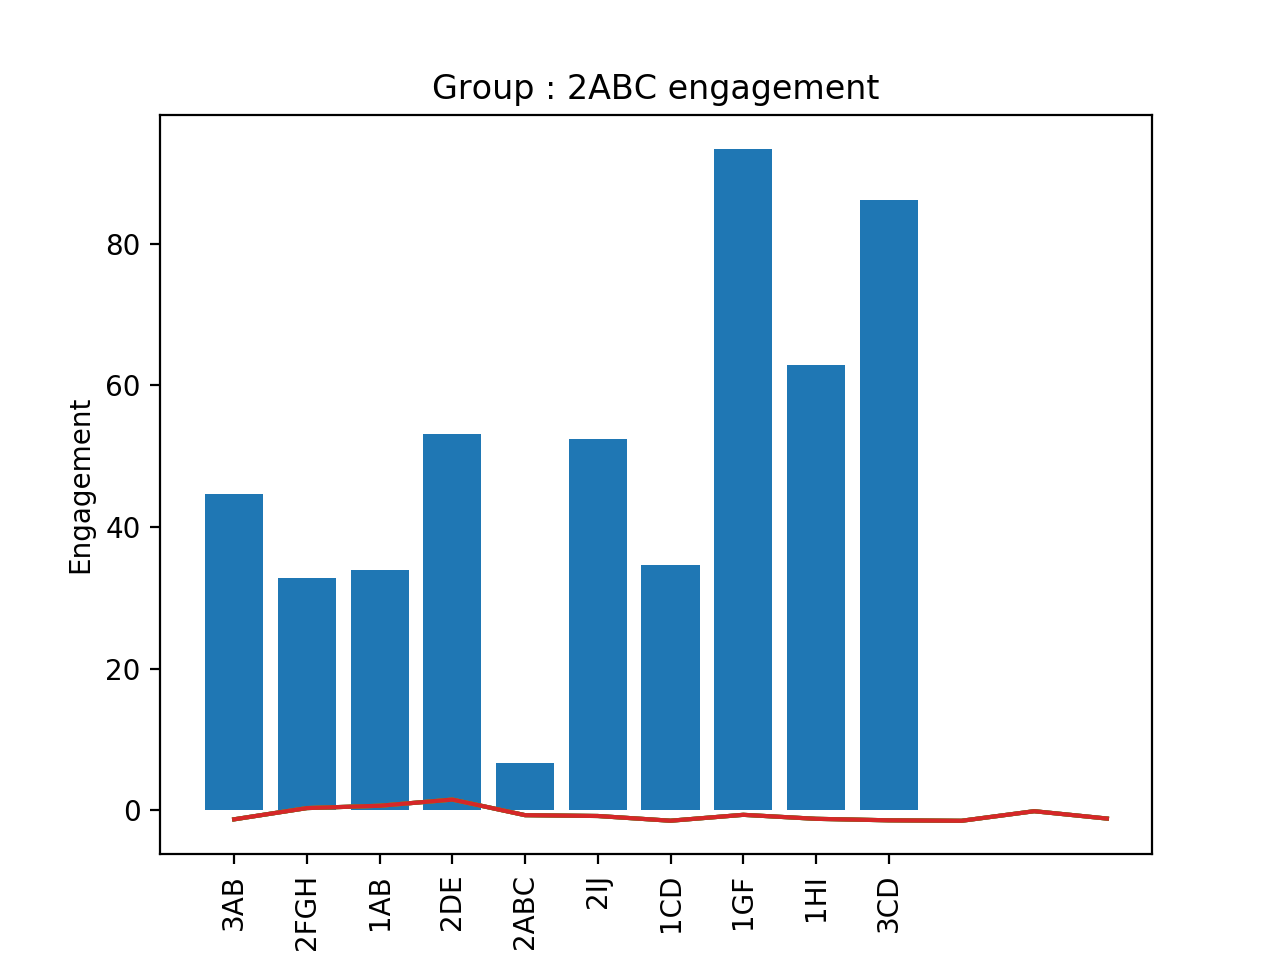

In [153]:
# Area calculation for each group
%matplotlib notebook
engagement_16th=dict()
for group in data_16th.group.unique():
    group_data = final_dim_16th.loc[final_dim_16th.group==group,:]
    a = group_data.loc[:,'engagement']
    #print(a.values)
    area = np.trapz(a.values)
    engagement_16th[group]=area
print(engagement_16th)


def normalize_data(data,dx):
    mi = np.min(data)-dx
    ma = np.max(data)+dx
    d = [100*(a-mi)/(ma-mi) for a in data]
    return d
normalize_16th = normalize_data(engagement_16th.values(),1)

plt.bar(range(len(normalize_16th)),normalize_16th)
plt.xticks(range(len(normalize_16th)),engagement_16th.keys())
#plt.title('Engagement level on 18th Nov')
plt.show()
plt.savefig('engage_18th')

## Analysis of 16th November data

In [68]:
# MFA was applied using another python library (which is not the part of anaconda libraries)
mfa_df1 = pd.read_csv('mfaresult_16th.csv')

In [69]:
# Adding resultant dimensions of MFA to data
data_16th['engagement'] = mfa_df1.iloc[:,1]
data_16th['techvsphy'] = mfa_df1.iloc[:,2]


final_dim_16th = data_16th.loc[:,['timestamp','group','engagement']]
final_dim_16th.set_index(pd.DatetimeIndex(final_dim_16th['timestamp']),inplace=True)

final_dim_both = data_both.loc[:,['timestamp','group','engagement']]
final_dim_both.set_index(pd.DatetimeIndex(final_dim_both['timestamp']),inplace=True)

<IPython.core.display.Javascript object>


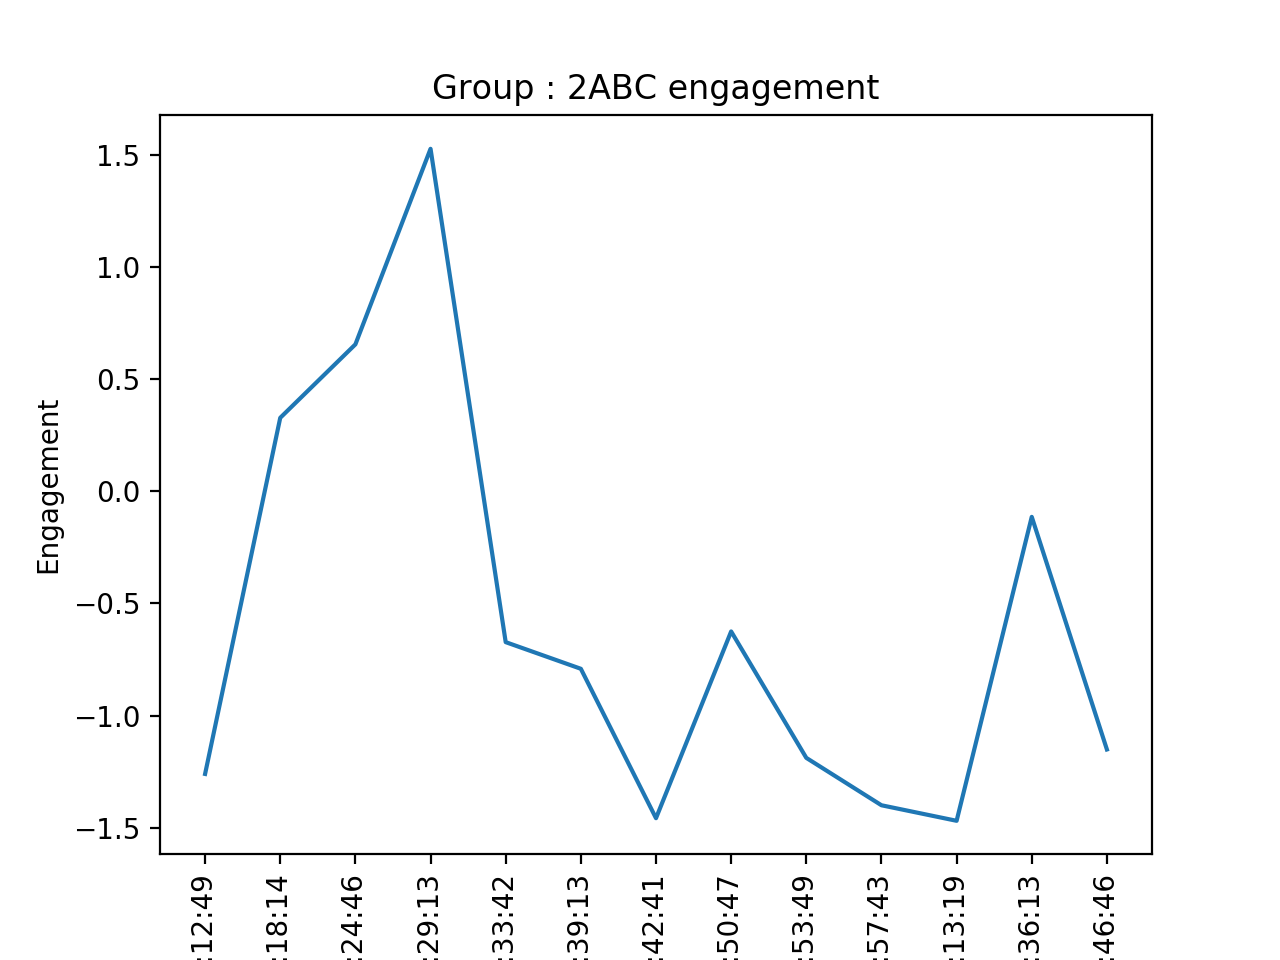

In [160]:
# Plotting time series data for each group
group = '2ABC'
plt.figure()
group_data = final_dim_16th.loc[final_dim_16th.group==group,:]

plt.plot(group_data['timestamp'],group_data['engagement'],label='18th Nov')
plt.xticks(rotation=90)
plt.ylabel('Engagement')
plt.title('Group : %s engagement'%group)
plt.show()
# Combined data analysis
plt.savefig('2ABC-group')

## Combined data analysis for both days